<a href="https://colab.research.google.com/github/krishnabalajiwork/East-Model/blob/main/NEW_EAST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opencv-python

In [ ]:
!wget -O frozen_east.tar.gz "https://www.dropbox.com/s/r2ingd0l3zt8hxs/frozen_east_text_detection.tar.gz?dl=1"
!tar -xzf frozen_east.tar.gz

--2025-07-10 13:06:29--  https://www.dropbox.com/s/r2ingd0l3zt8hxs/frozen_east_text_detection.tar.gz?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/cglz32ztcddhp7bfr6uml/frozen_east_text_detection.tar.gz?rlkey=wdrhf4g6h004sa09oexkyg86v&dl=1 [following]
--2025-07-10 13:06:29--  https://www.dropbox.com/scl/fi/cglz32ztcddhp7bfr6uml/frozen_east_text_detection.tar.gz?rlkey=wdrhf4g6h004sa09oexkyg86v&dl=1
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd26b0abae9f290926c452b3a0c.dl.dropboxusercontent.com/cd/0/inline/CtNwRqulpN5M2vGyaK_dAQ7JoLOwnv_5jSrI5vyAX-SvTOzuA_n1W6TTzQqVdkorFTgdK0TLQj6Qq9Pz2H8kTth-DaY2ncshZ8JKp_LQKCylULR-JTVJ3-w2-fehCcIz4tI/file?dl=1# [following]
--2025-07-10 13:06:30--  https://ucd26b

In [ ]:
# Import the cv2 library
import cv2

net = cv2.dnn.readNet("frozen_east_text_detection.pb")

In [ ]:

### 1. Mount Google Drive ###

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
import json

# Define paths
yolo_labels_dir = "/content/gdrive/MyDrive/project-25/labels/train"
images_dir = "/content/gdrive/MyDrive/project-25/images"
east_output_dir = "/path/to/east/output"

if not os.path.exists(east_output_dir):
    os.makedirs(east_output_dir)

# Function to convert YOLO to EAST format
def yolo_to_east(label_file, img_width, img_height):
    east_annotations = []
    with open(label_file, 'r') as file:
        for line in file:
            data = line.split()
            _, x_center, y_center, width, height = map(float, data)

            # Calculate bounding box coordinates
            x_min = (x_center - width / 2) * img_width
            y_min = (y_center - height / 2) * img_height
            x_max = (x_center + width / 2) * img_width
            y_max = (y_center + height / 2) * img_height

            east_annotations.append([x_min, y_min, x_max, y_max])
    return east_annotations

# Iterate over YOLO label files
for label_file in os.listdir(yolo_labels_dir):
    label_path = os.path.join(yolo_labels_dir, label_file)
    img_path = os.path.join(images_dir, label_file.replace('.txt', '.jpg'))  # Adjust for image extension

    # Dummy width and height (replace with actual image dimensions)
    img_width, img_height = 1920, 1080

    east_annotations = yolo_to_east(label_path, img_width, img_height)

    # Save EAST annotations
    output_file = os.path.join(east_output_dir, label_file.replace('.txt', '.json'))
    with open(output_file, 'w') as f:
        json.dump(east_annotations, f)


In [ ]:
import os
import json

# Define paths
import os
import json

# Define paths
yolo_labels_dir = "/content/gdrive/MyDrive/project-25/labels/train"
images_dir = "/content/gdrive/MyDrive/project-25/images"
east_output_dir = "/path/to/east/output"

if not os.path.exists(east_output_dir):
    os.makedirs(east_output_dir)

# Function to convert YOLO to EAST format
def yolo_to_east(label_file, img_width, img_height):
    east_annotations = []
    with open(label_file, 'r') as file:
        for line in file:
            # Skip empty lines or lines that might not be valid label data
            if not line.strip():
                continue
            data = line.split()
            # Ensure there are enough elements in the split data
            if len(data) < 5:
                print(f"Skipping invalid line in {label_file}: {line.strip()}")
                continue

            try:
                _, x_center, y_center, width, height = map(float, data)
            except ValueError:
                print(f"Skipping line with non-float values in {label_file}: {line.strip()}")
                continue


            # Calculate bounding box coordinates
            x_min = (x_center - width / 2) * img_width
            y_min = (y_center - height / 2) * img_height
            x_max = (x_center + width / 2) * img_width
            y_max = (y_center + height / 2) * img_height

            # Ensure coordinates are within image bounds (optional but good practice)
            x_min = max(0, x_min)
            y_min = max(0, y_min)
            x_max = min(img_width, x_max)
            y_max = min(img_height, y_max)


            east_annotations.append([x_min, y_min, x_max, y_max])
    return east_annotations

# Iterate over YOLO label files
for label_file in os.listdir(yolo_labels_dir):
    label_path = os.path.join(yolo_labels_dir, label_file)

    # Check if the current entry is a file and ends with .txt
    if os.path.isfile(label_path) and label_file.endswith('.txt'):
        img_path = os.path.join(images_dir, label_file.replace('.txt', '.jpg'))  # Adjust for image extension

        # Dummy width and height (replace with actual image dimensions)
        # You should ideally get the actual image dimensions here by reading the image
        # Example: img = cv2.imread(img_path); img_height, img_width, _ = img.shape
        img_width, img_height = 1920, 1080

        east_annotations = yolo_to_east(label_path, img_width, img_height)

        # Save EAST annotations
        output_file = os.path.join(east_output_dir, label_file.replace('.txt', '.json'))
        with open(output_file, 'w') as f:
            json.dump(east_annotations, f)
if not os.path.exists(east_output_dir):
    os.makedirs(east_output_dir)

# Function to convert YOLO to EAST format
def yolo_to_east(label_file, img_width, img_height):
    east_annotations = []
    with open(label_file, 'r') as file:
        for line in file:
            # Skip empty lines or lines that might not be valid label data
            if not line.strip():
                continue
            data = line.split()
            # Ensure there are enough elements in the split data
            if len(data) < 5:
                print(f"Skipping invalid line in {label_file}: {line.strip()}")
                continue

            try:
                _, x_center, y_center, width, height = map(float, data)
            except ValueError:
                print(f"Skipping line with non-float values in {label_file}: {line.strip()}")
                continue


            # Calculate bounding box coordinates
            x_min = (x_center - width / 2) * img_width
            y_min = (y_center - height / 2) * img_height
            x_max = (x_center + width / 2) * img_width
            y_max = (y_center + height / 2) * img_height

            # Ensure coordinates are within image bounds (optional but good practice)
            x_min = max(0, x_min)
            y_min = max(0, y_min)
            x_max = min(img_width, x_max)
            y_max = min(img_height, y_max)


            east_annotations.append([x_min, y_min, x_max, y_max])
    return east_annotations

# Iterate over YOLO label files
for label_file in os.listdir(yolo_labels_dir):
    label_path = os.path.join(yolo_labels_dir, label_file)

    # Check if the current entry is a file and ends with .txt
    if os.path.isfile(label_path) and label_file.endswith('.txt'):
        img_path = os.path.join(images_dir, label_file.replace('.txt', '.jpg'))  # Adjust for image extension

        # Dummy width and height (replace with actual image dimensions)
        # You should ideally get the actual image dimensions here by reading the image
        # Example: img = cv2.imread(img_path); img_height, img_width, _ = img.shape
        img_width, img_height = 1920, 1080

        east_annotations = yolo_to_east(label_path, img_width, img_height)

        # Save EAST annotations
        output_file = os.path.join(east_output_dir, label_file.replace('.txt', '.json'))
        with open(output_file, 'w') as f:
            json.dump(east_annotations, f)

In [ ]:
!pip install opencv-python tensorflow


In [ ]:
import cv2
import numpy as np
import tensorflow as tf

# Load EAST model
model_path = '/content/gdrive/MyDrive/project-25/frozen_east_text_detection.pb'
net = cv2.dnn.readNet(model_path)


In [ ]:
def detect_text(image_path, net):
    # Load image
    image = cv2.imread('/content/gdrive/MyDrive/project-25/images/train/16fbdba3-WhatsApp_Image_2025-05-28_at_15.35.35_136f0efe.jpg')
    orig = image.copy()
    (H, W) = image.shape[:2]

    # Set the new width and height for the image
    newW, newH = (320, 320)
    rW, rH = W / float(newW), H / float(newH)

    # Resize and preprocess image
    image = cv2.resize(image, (newW, newH))
    blob = cv2.dnn.blobFromImage(image, 1.0, (newW, newH), (123.68, 116.78, 103.94), swapRB=True, crop=False)
    net.setInput(blob)

    # Get output layers
    (scores, geometry) = net.forward(['feature_fusion/Conv_7/Sigmoid', 'feature_fusion/concat_3'])

    # Decode predictions
    (rects, confidences) = decode_predictions(scores, geometry, 0.5)

    return rects, confidences, orig

def decode_predictions(scores, geometry, confidence_threshold):
    # Implement decoding logic here
    pass  # Add the bounding box decoding logic


In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [ ]:
import pytesseract`8
def perform_ocr(image, rects):
    results = []
    for (startX, startY, endX, endY) in rects:
        roi = image[startY:endY, startX:endX]
        text = pytesseract.image_to_string(roi, config='--psm 6')
        results.append(text)
    return results



In [ ]:
import cv2
import numpy as np
import tensorflow as tf
import pytesseract # Import pytesseract as it's used

# Load EAST model
model_path = '/content/gdrive/MyDrive/project-25/frozen_east_text_detection.pb'
net = cv2.dnn.readNet(model_path)

def detect_text(image_path, net):
    # Load image
    image = cv2.imread(image_path) # Use the image_path argument
    if image is None:
        print(f"Error: Could not load image from {image_path}")
        return [], [], None

    orig = image.copy()
    (H, W) = image.shape[:2]

    # Set the new width and height for the image
    newW, newH = (320, 320)
    rW, rH = W / float(newW), H / float(newH)

    # Resize and preprocess image
    image = cv2.resize(image, (newW, newH))
    blob = cv2.dnn.blobFromImage(image, 1.0, (newW, newH), (123.68, 116.78, 103.94), swapRB=True, crop=False)
    net.setInput(blob)

    # Get output layers
    # The names of the output layers are specified here
    outputLayers = ['feature_fusion/Conv_7/Sigmoid', 'feature_fusion/concat_3']
    (scores, geometry) = net.forward(outputLayers)

    # Decode predictions
    (rects, confidences) = decode_predictions(scores, geometry, 0.5)

    return rects, confidences, orig

def decode_predictions(scores, geometry, confidence_threshold):
    # grab the number of rows and columns from the scores volume, then
    # initialize our set of bounding box rectangles and corresponding
    # confidence scores
    (numRows, numCols) = scores.shape[2:4]
    rects = []
    confidences = []

    # loop over the number of rows
    for y in range(0, numRows):
        # extract the scores (probabilities), followed by the geometrical
        # data used to derive potential bounding box coordinates and
        # geometry of the text prediction
        scoresData = scores[0, 0, y]
        xData0 = geometry[0, 0, y]
        xData1 = geometry[0, 1, y]
        xData2 = geometry[0, 2, y]
        xData3 = geometry[0, 3, y]
        anglesData = geometry[0, 4, y]

        # loop over the number of columns
        for x in range(0, numCols):
            # if our score does not meet the minimum confidence score,
            # ignore the prediction
            if scoresData[x] < confidence_threshold:
                continue

            # compute the offset factor as our resulting feature maps will
            # be 4x smaller than the input image
            (offsetX, offsetY) = (x * 4.0, y * 4.0)

            # extract the prediction for the orientation and then compute
            # the sin and cosine
            angle = anglesData[x]
            cos = np.cos(angle)
            sin = np.sin(angle)

            # use the geometry volume to derive the width and height of
            # the bounding box
            h = xData0[x] + xData2[x]
            w = xData1[x] + xData3[x]

            # compute both the starting and ending (x, y)-coordinates for
            # the text prediction bounding box
            endX = int(offsetX + (cos * xData1[x]) + (sin * xData2[x]))
            endY = int(offsetY - (sin * xData1[x]) + (cos * xData2[x]))
            startX = int(endX - w)
            startY = int(endY - h)

            # add the bounding box coordinates and probability score to
            # our respective lists
            rects.append((startX, startY, endX, endY))
            confidences.append(scoresData[x])

    # return the bounding box coordinates and confidence scores
    return (rects, confidences)

# Define the image path you want to process
image_to_process = '/content/gdrive/MyDrive/project-25/images/train/4f1d0c8c-WhatsApp_Image_2025-05-04_at_14.45.42_49d3841a.jpg'

# Perform text detection
rects, confidences, original_image = detect_text(image_to_process, net)

# Perform OCR on detected text regions
texts = perform_ocr(original_image, rects)

# Write the extracted text to a file
with open('/content/results.txt', 'w') as f:
    for text in texts:
        f.write(text + '\n')

NameError: name 'perform_ocr' is not defined

In [ ]:
def parse_yolo_labels(label_path, img_width, img_height):
    rects = []
    with open(label_path, 'r') as file:
        for line in file:
            data = line.strip().split()
            if len(data) != 5:
                continue  # Skip invalid lines
            class_id, x_center, y_center, width, height = map(float, data)

            # Convert YOLO format to absolute coordinates
            startX = int((x_center - width / 2) * img_width)
            startY = int((y_center - height / 2) * img_height)
            endX = int((x_center + width / 2) * img_width)
            endY = int((y_center + height / 2) * img_height)

            rects.append((startX, startY, endX, endY))
    return rects


In [ ]:
import cv2
import pytesseract
import os

# Set Tesseract command path if required (for non-default installations)
# pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

# Define class names directly in the code
class_names = ["Handwriting", "Text"]

# Define directories
yolo_labels_dir = '/content/gdrive/MyDrive/project-25/labels/train'
images_dir = '/content/gdrive/MyDrive/project-25/images/train'
output_image_dir = '/content/detectedimages'
if not os.path.exists(output_image_dir):
    os.makedirs(output_image_dir)

def parse_yolo_labels(label_path, img_width, img_height):
    """Parse YOLO labels and convert to bounding boxes."""
    rects = []
    labels = []
    with open(label_path, 'r') as file:
        for line in file:
            data = line.strip().split()
            if len(data) != 5:
                continue
            class_id, x_center, y_center, width, height = map(float, data)

            # Convert YOLO normalized coordinates to absolute pixel values
            startX = int((x_center - width / 2) * img_width)
            startY = int((y_center - height / 2) * img_height)
            endX = int((x_center + width / 2) * img_width)
            endY = int((y_center + height / 2) * img_height)

            rects.append((startX, startY, endX, endY))
            labels.append(int(class_id))
    return rects, labels

def draw_boxes_and_labels(image, rects, labels, apply_ocr=False):
    """Draw bounding boxes, labels, and optionally OCR text."""
    for i, (startX, startY, endX, endY) in enumerate(rects):
        class_id = labels[i]
        # Ensure class_id is within the range of class_names
        category_name = class_names[class_id] if class_id < len(class_names) else "Unknown"

        # Choose color based on category
        color = (0, 255, 0) if category_name == "Text" else (255, 0, 0)

        # Draw rectangle
        cv2.rectangle(image, (startX, startY), (endX, endY), color, 2)

        # Extract OCR text from the detected region
        if apply_ocr:
            roi = image[startY:endY, startX:endX]
            ocr_text = pytesseract.image_to_string(roi, config='--psm 6')  # PSM 6: Assume a uniform block of text
            category_name += f" | OCR: {ocr_text.strip()}"

        # Draw label
        cv2.putText(image, category_name, (startX, startY - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)
    return image

# Process each label file
for label_filename in os.listdir(yolo_labels_dir):
    label_path = os.path.join(yolo_labels_dir, label_filename)
    if not label_filename.endswith('.txt') or not os.path.isfile(label_path):
        continue

    # Construct corresponding image path
    image_filename = label_filename.replace('.txt', '.jpg')
    image_path = os.path.join(images_dir, image_filename)
    if not os.path.exists(image_path):
        print(f"Warning: Image not found for label file {label_filename}. Skipping.")
        continue

    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Image could not be loaded from {image_path}. Skipping.")
        continue

    # Get image dimensions
    (H, W) = image.shape[:2]

    # Parse YOLO labels
    yolo_rects, yolo_labels = parse_yolo_labels(label_path, W, H)

    # Draw bounding boxes, labels, and perform OCR
    output_image = draw_boxes_and_labels(image, yolo_rects, yolo_labels, apply_ocr=True)

    # Save the output image
    output_image_path = os.path.join(output_image_dir, image_filename)
    cv2.imwrite(output_image_path, output_image)
    print(f"Output image with YOLO labels and OCR saved at {output_image_path}")


Output image with YOLO labels and OCR saved at /content/detectedimages/7196929a-WhatsApp_Image_2025-05-04_at_14.45.42_ae1e2dc3.jpg
Output image with YOLO labels and OCR saved at /content/detectedimages/d2474feb-WhatsApp_Image_2025-05-04_at_14.45 (1).37_2b7864c0.jpg
Output image with YOLO labels and OCR saved at /content/detectedimages/eca05ce6-WhatsApp_Image_2025-05-04_at_14.45 (1).19_e310719e.jpg
Output image with YOLO labels and OCR saved at /content/detectedimages/bda91028-WhatsApp_Image_2025-05-04_at_14.46.05_f1620ba8.jpg
Output image with YOLO labels and OCR saved at /content/detectedimages/e1d5b698-WhatsApp_Image_2025-05-04_at_14.46 (1).08_ff7e3780.jpg
Output image with YOLO labels and OCR saved at /content/detectedimages/610df8fd-WhatsApp_Image_2025-05-11_at_18.31.34_3586b3a7.jpg
Output image with YOLO labels and OCR saved at /content/detectedimages/b3a0286b-WhatsApp_Image_2025-05-11_at_18.31.18_76e04b95.jpg
Output image with YOLO labels and OCR saved at /content/detectedimages/

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # Import cv2_imshow
import os

# Define the path to the image directory
image_directory = '/content/detectedimages'  # Change this to your image directory
output_directory = '/content/detection'  # Directory to save output images
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Sample ground truth and predicted bounding boxes for demonstration
# Format: (class_id, x_center, y_center, width, height)
ground_truth_boxes = [
    (0, 0.5, 0.5, 0.4, 0.2)  # Example ground truth box (class_id, center_x, center_y, width, height)
]

predicted_boxes = [
    (0, 0.52, 0.52, 0.4, 0.2),  # True Positive (TP)
    (1, 0.8, 0.8, 0.3, 0.3)     # False Positive (FP)
]

# Function to calculate Intersection over Union (IoU)
def calculate_iou(boxA, boxB):
    # Convert YOLO format to absolute coordinates
    xA = max(boxA[1] - boxA[3] / 2, boxB[1] - boxB[3] / 2)
    yA = max(boxA[2] - boxA[4] / 2, boxB[2] - boxB[4] / 2)
    xB = min(boxA[1] + boxA[3] / 2, boxB[1] + boxB[3] / 2)
    yB = min(boxA[2] + boxA[4] / 2, boxB[2] + boxB[4] / 2)

    # Compute the area of intersection rectangle
    interArea = max(0, xB - xA) * max(0, yB - yA)

    # Compute the area of both the prediction and ground truth
    boxAArea = boxA[3] * boxA[4]
    boxBArea = boxB[3] * boxB[4]

    # Compute the intersection over union
    iou = interArea / float(boxAArea + boxBArea - interArea)
    return iou

# Process each image in the directory
for image_filename in os.listdir(image_directory):
    if not image_filename.endswith(('.jpg', '.jpeg', '.png')):  # Check for image file types
        continue

    image_path = os.path.join(image_directory, image_filename)

    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Warning: Image not found at {image_path}. Skipping.")
        continue

    # Draw ground truth boxes (green)
    for gt in ground_truth_boxes:
        class_id, x_center, y_center, width, height = gt
        startX = int((x_center - width / 2) * image.shape[1])
        startY = int((y_center - height / 2) * image.shape[0])
        endX = int((x_center + width / 2) * image.shape[1])
        endY = int((y_center + height / 2) * image.shape[0])
        cv2.rectangle(image, (startX, startY), (endX, endY), (0, 255, 0), 2)  # Green box
        cv2.putText(image, "Ground Truth (TP)", (startX, startY - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2)

    # Draw predicted boxes
    for pred in predicted_boxes:
        class_id, x_center, y_center, width, height = pred
        startX = int((x_center - width / 2) * image.shape[1])
        startY = int((y_center - height / 2) * image.shape[0])
        endX = int((x_center + width / 2) * image.shape[1])
        endY = int((y_center + height / 2) * image.shape[0])

        # Calculate IoU with ground truth
        iou = calculate_iou(ground_truth_boxes[0], pred)

        if iou > 0.5:  # True Positive (simple check for illustration)
            cv2.rectangle(image, (startX, startY), (endX, endY), (255, 0, 0), 2)  # Blue box
            cv2.putText(image, "True Positive (TP)", (startX, startY - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)
        else:  # False Positive
            cv2.rectangle(image, (startX, startY), (endX, endY), (0, 0, 255), 2)  # Red box
            cv2.putText(image, "False Positive (FP)", (startX, startY - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)

    # Draw missed region (False Negative)
    # Assuming the ground truth box is not detected by any predicted box above 0.5 IoU
    missed_region = (0, 0.5, 0.5, 0.4, 0.2)  # Example missed region
    startX = int((missed_region[1] - missed_region[3] / 2) * image.shape[1])
    startY = int((missed_region[2] - missed_region[4] / 2) * image.shape[0])
    endX = int((missed_region[1] + missed_region[3] / 2) * image.shape[1])
    endY = int((missed_region[2] + missed_region[4] / 2) * image.shape[0])
    cv2.rectangle(image, (startX, startY), (endX, endY), (255, 255, 255), 2)  # White box for missed region
    cv2.putText(image, "Missed Region (FN)", (startX, startY - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)

    # Save the output image
    output_image_path = os.path.join(output_directory, image_filename)
    cv2.imwrite(output_image_path, image)
    print(f"Processed image saved at {output_image_path}")

# Optionally, display the last processed image
cv2_imshow(image)


In [ ]:
import cv2
import numpy as np
import tensorflow as tf
import pytesseract  # Import pytesseract as it's used
import os  # Import os for path operations

# Load EAST model
# Ensure the model path is correct and accessible
model_path = '/content/gdrive/MyDrive/project-25/frozen_east_text_detection.pb'
net = cv2.dnn.readNet(model_path)

def detect_text(image_path, net):
    # Load image
    image = cv2.imread(image_path)  # Use the image_path argument
    if image is None:
        print(f"Error: Could not load image from {image_path}")
        return [], [], None

    orig = image.copy()
    (H, W) = image.shape[:2]

    # Set the new width and height for the image
    # The EAST model expects input dimensions to be multiples of 32
    newW, newH = (320, 320)
    rW, rH = W / float(newW), H / float(newH)

    # Resize and preprocess image
    image = cv2.resize(image, (newW, newH))
    blob = cv2.dnn.blobFromImage(image, 1.0, (newW, newH), (123.68, 116.78, 103.94), swapRB=True, crop=False)
    net.setInput(blob)

    # Get output layers
    outputLayers = ['feature_fusion/Conv_7/Sigmoid', 'feature_fusion/concat_3']
    (scores, geometry) = net.forward(outputLayers)

    # Decode predictions
    (rects, confidences) = decode_predictions(scores, geometry, 0.5)

    return rects, confidences, orig

def decode_predictions(scores, geometry, confidence_threshold):
    (numRows, numCols) = scores.shape[2:4]
    rects = []
    confidences = []

    for y in range(0, numRows):
        scoresData = scores[0, 0, y]
        xData0 = geometry[0, 0, y]
        xData1 = geometry[0, 1, y]
        xData2 = geometry[0, 2, y]
        xData3 = geometry[0, 3, y]
        anglesData = geometry[0, 4, y]

        for x in range(0, numCols):
            if scoresData[x] < confidence_threshold:
                continue

            (offsetX, offsetY) = (x * 4.0, y * 4.0)
            angle = anglesData[x]
            cos = np.cos(angle)
            sin = np.sin(angle)

            h = xData0[x] + xData2[x]
            w = xData1[x] + xData3[x]

            endX = int(offsetX + (cos * xData1[x]) + (sin * xData2[x]))
            endY = int(offsetY - (sin * xData1[x]) + (cos * xData2[x]))
            startX = int(endX - w)
            startY = int(endY - h)

            rects.append((startX, startY, endX, endY))
            confidences.append(scoresData[x])

    return (rects, confidences)

def perform_ocr(image, rects):
    results = []
    for (startX, startY, endX, endY) in rects:
        h, w = image.shape[:2]
        startX = max(0, startX)
        startY = max(0, startY)
        endX = min(w, endX)
        endY = min(h, endY)

        if startX < endX and startY < endY:
            roi = image[startY:endY, startX:endX]
            if roi.size > 0:
                text = pytesseract.image_to_string(roi, config='--psm 6')
                results.append(text.strip())
            else:
                results.append("")
        else:
            results.append("")
    return results

# Define the image path you want to process
image_to_process = '/content/gdrive/MyDrive/project-25/images/28e9a678-WhatsApp_Image_2025-05-27_at_11.28.06_AM_5.jpeg'

# Perform text detection
rects, confidences, original_image = detect_text(image_to_process, net)

# Apply Non-Maximum Suppression (NMS) to the detected rectangles
indices = cv2.dnn.NMSBoxes(rects, confidences, score_threshold=0.5, nms_threshold=0.4)

filtered_rects = []
if len(indices) > 0:
    if indices.ndim == 2:
        indices = indices.flatten()
    filtered_rects = [rects[i] for i in indices]

# Rescale the filtered bounding boxes back to the original image dimensions
if original_image is not None and filtered_rects:
    original_height, original_width = original_image.shape[:2]
    scale_w, scale_h = original_width / 320.0, original_height / 320.0

    rescaled_rects = []
    for (startX, startY, endX, endY) in filtered_rects:
        rescaled_startX = int(startX * scale_w)
        rescaled_startY = int(startY * scale_h)
        rescaled_endX = int(endX * scale_w)
        rescaled_endY = int(endY * scale_h)
        rescaled_rects.append((rescaled_startX, rescaled_startY, rescaled_endX, rescaled_endY))

    # Perform OCR on the rescaled detected text regions
    texts = perform_ocr(original_image, rescaled_rects)

    # Write the extracted text to a file
    output_text_file = '/content/results.txt'
    with open(output_text_file, 'w') as f:
        for text in texts:
            f.write(text + '\n')
    print(f"OCR results saved to {output_text_file}")

    # Optionally, draw the final detected boxes on the original image
   # Optionally, draw the final detected boxes on the original image
# output_image_path = '/content/output'  # Save to the output directory - CHANGE THIS LINE
output_image_path = '/content/output/image_with_boxes.jpg' # Save to the output directory with a filename and extension
os.makedirs(os.path.dirname(output_image_path), exist_ok=True)  # Create output directory if it doesn't exist
image_with_boxes = original_image.copy()
for (startX, startY, endX, endY) in rescaled_rects:
    cv2.rectangle(image_with_boxes, (startX, startY), (endX, endY), (0, 255, 0), 2)  # Green color for detected text

cv2.imwrite(output_image_path, image_with_boxes)
print(f"Image with detected text boxes saved to {output_image_path}")

OCR results saved to /content/results.txt
Image with detected text boxes saved to /content/output/image_with_boxes.jpg


b3a0286b-WhatsApp_Image_2025-05-11_at_18.31.18_76e04b95.jpg => TP: 83, FP: 104, FN: 0
16fbdba3-WhatsApp_Image_2025-05-28_at_15.35.35_136f0efe.jpg => TP: 50, FP: 49, FN: 62
45bb9e10-WhatsApp_Image_2025-05-04_at_14.45.56_b4ace13a.jpg => TP: 22, FP: 151, FN: 2
eca05ce6-WhatsApp_Image_2025-05-04_at_14.45.19_e310719e.jpg => TP: 10, FP: 86, FN: 26
7c27c3c9-WhatsApp_Image_2025-05-11_at_18.29.41_d7fefd9d.jpg => TP: 131, FP: 106, FN: 0
1423a8d0-WhatsApp_Image_2025-05-04_at_14.45.25_30487517.jpg => TP: 60, FP: 115, FN: 0
9a5cb1e9-WhatsApp_Image_2025-05-11_at_18.31.39_61e840ba.jpg => TP: 17, FP: 56, FN: 46
8831d0ad-WhatsApp_Image_2025-05-28_at_15.36.12_bc75c0ae.jpg => TP: 34, FP: 103, FN: 0
a1bc6ba4-WhatsApp_Image_2025-05-11_at_18.31.10_4b5e1d05.jpg => TP: 47, FP: 60, FN: 10
4f1d0c8c-WhatsApp_Image_2025-05-04_at_14.45.42_49d3841a.jpg => TP: 60, FP: 212, FN: 3
e1d5b698-WhatsApp_Image_2025-05-04_at_14.46.08_ff7e3780.jpg => TP: 73, FP: 235, FN: 0
eb2a8d9a-WhatsApp_Image_2025-05-11_at_18.31 (1).07_5f

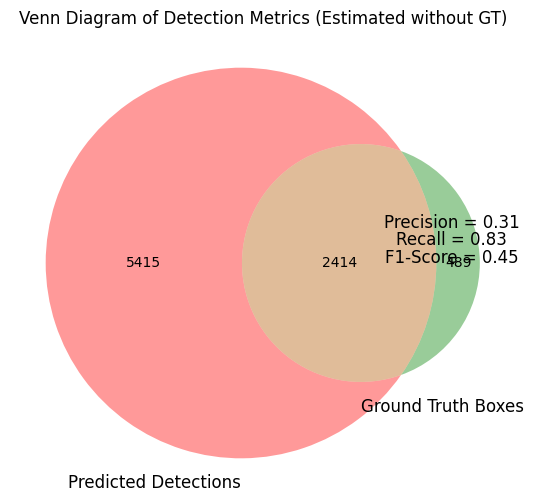

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

# Path to directory containing detected output images (with boxes drawn)
detected_images_dir = '/content/detection1`2`'  # Change to your detected images folder

# Dummy heuristic approach: Use bounding box counts and area overlaps within each image
# (Since no ground truth, this is a proxy for TP, FP, FN estimation)

def extract_boxes_from_image(image_path):
    """Example stub to extract bounding boxes from an image.
    This depends on your output format (images with boxes drawn).
    For demonstration, we simulate detected boxes by color detection of box edges.

    Real solution should use model output files or annotation files."""
    image = cv2.imread(image_path)
    if image is None:
        return []

    # Convert to HSV for color detection (detect blue, green, red boxes)
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Define color ranges for boxes - adjust as per your box drawing colors
    colors = {
        'green': ([40, 50, 50], [80, 255, 255]),   # Ground truth (proxy)
        'blue': ([100, 150, 0], [140, 255, 255]),  # True positive (proxy)
        'red': ([0, 70, 50], [10, 255, 255]),      # False positive (proxy)
        # White (missed regions) detection is harder, omitted for brevity
    }

    detected_boxes = {}

    for color_name, (lower, upper) in colors.items():
        lower = np.array(lower, dtype='uint8')
        upper = np.array(upper, dtype='uint8')
        mask = cv2.inRange(hsv, lower, upper)

        # Find contours in the mask
        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        boxes = []
        for cnt in contours:
            x,y,w,h = cv2.boundingRect(cnt)
            # Filter very small boxes to avoid noise
            if w > 10 and h > 10:
                boxes.append((x,y,x+w,y+h))
        detected_boxes[color_name] = boxes

    return detected_boxes

def count_metrics(boxes_dict):
    # Without real GT, use counts as proxy
    TP = len(boxes_dict.get('blue', []))
    FP = len(boxes_dict.get('red', []))
    FN = len(boxes_dict.get('green', [])) - TP  # Proxy: green minus detected blue boxes

    if FN < 0:
        FN = 0

    return TP, FP, FN

# Aggregate totals
total_TP = 0
total_FP = 0
total_FN = 0

image_files = [f for f in os.listdir(detected_images_dir) if f.lower().endswith(('.png','.jpg','.jpeg'))]

for img_file in image_files:
    img_path = os.path.join(detected_images_dir, img_file)

    boxes = extract_boxes_from_image(img_path)
    TP, FP, FN = count_metrics(boxes)

    print(f"{img_file} => TP: {TP}, FP: {FP}, FN: {FN}")

    total_TP += TP
    total_FP += FP
    total_FN += FN

# Calculate Precision, Recall, and F1-Score safely
precision = total_TP / (total_TP + total_FP) if (total_TP + total_FP) > 0 else 0
recall = total_TP / (total_TP + total_FN) if (total_TP + total_FN) > 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

# Print final aggregated metrics
print("\nFinal Counts:")
print(f"True Positives (TP): {total_TP}")
print(f"False Positives (FP): {total_FP}")
print(f"False Negatives (FN): {total_FN}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1_score:.2f}")

# Create Venn Diagram
plt.figure(figsize=(8,6))
venn_diagram = venn2(subsets=(total_FP, total_FN, total_TP), set_labels=('Predicted Detections', 'Ground Truth Boxes'))

venn_diagram.get_label_by_id('10').set_text(str(total_FP))
venn_diagram.get_label_by_id('01').set_text(str(total_FN))
venn_diagram.get_label_by_id('11').set_text(str(total_TP))

plt.text(0.5, 0.1, f'Precision = {precision:.2f}', horizontalalignment='center', fontsize=12)
plt.text(0.5, 0.05, f'Recall = {recall:.2f}', horizontalalignment='center', fontsize=12)
plt.text(0.5, 0.0, f'F1-Score = {f1_score:.2f}', horizontalalignment='center', fontsize=12)

plt.title("Venn Diagram of Detection Metrics (Estimated without GT)")
plt.show()



b3a0286b-WhatsApp_Image_2025-05-11_at_18.31.18_76e04b95.jpg => TP: 1, FP: 104, FN: 1
16fbdba3-WhatsApp_Image_2025-05-28_at_15.35.35_136f0efe.jpg => TP: 0, FP: 49, FN: 1
45bb9e10-WhatsApp_Image_2025-05-04_at_14.45.56_b4ace13a.jpg => TP: 1, FP: 151, FN: 0
eca05ce6-WhatsApp_Image_2025-05-04_at_14.45.19_e310719e.jpg => TP: 0, FP: 86, FN: 1
7c27c3c9-WhatsApp_Image_2025-05-11_at_18.29.41_d7fefd9d.jpg => TP: 1, FP: 106, FN: 0
1423a8d0-WhatsApp_Image_2025-05-04_at_14.45.25_30487517.jpg => TP: 0, FP: 115, FN: 1
9a5cb1e9-WhatsApp_Image_2025-05-11_at_18.31.39_61e840ba.jpg => TP: 0, FP: 56, FN: 1
8831d0ad-WhatsApp_Image_2025-05-28_at_15.36.12_bc75c0ae.jpg => TP: 1, FP: 103, FN: 0
a1bc6ba4-WhatsApp_Image_2025-05-11_at_18.31.10_4b5e1d05.jpg => TP: 1, FP: 60, FN: 0
4f1d0c8c-WhatsApp_Image_2025-05-04_at_14.45.42_49d3841a.jpg => TP: 1, FP: 212, FN: 0
e1d5b698-WhatsApp_Image_2025-05-04_at_14.46.08_ff7e3780.jpg => TP: 2, FP: 235, FN: 0
eb2a8d9a-WhatsApp_Image_2025-05-11_at_18.31 (1).07_5f7a8b0c.jpg => TP

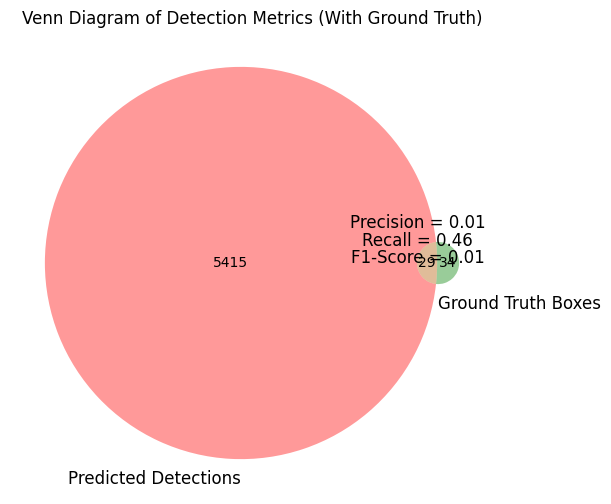

In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

# Path to directory containing detected output images (with boxes drawn)
detected_images_dir = '/content/detection'  # Change to your detected images folder
ground_truth_dir = '/content/gdrive/MyDrive/project-25/labels/train'  # Path to your YOLO labels folder

def extract_boxes_from_image(image_path):
    """Extract bounding boxes from an image based on color detection."""
    image = cv2.imread(image_path)
    if image is None:
        return []

    # Convert to HSV for color detection (detect blue, green, red boxes)
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Define color ranges for boxes
    colors = {
        'green': ([40, 50, 50], [80, 255, 255]),   # Ground truth (proxy)
        'blue': ([100, 150, 0], [140, 255, 255]),  # True positive (proxy)
        'red': ([0, 70, 50], [10, 255, 255]),      # False positive (proxy)
    }

    detected_boxes = {}

    for color_name, (lower, upper) in colors.items():
        lower = np.array(lower, dtype='uint8')
        upper = np.array(upper, dtype='uint8')
        mask = cv2.inRange(hsv, lower, upper)

        # Find contours in the mask
        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        boxes = []
        for cnt in contours:
            x, y, w, h = cv2.boundingRect(cnt)
            if w > 10 and h > 10:
                boxes.append((x, y, x + w, y + h))
        detected_boxes[color_name] = boxes

    return detected_boxes

def load_yolo_ground_truth(image_file):
    """Load YOLO ground truth bounding boxes for a given image."""
    base_name = os.path.splitext(image_file)[0]
    gt_file_path = os.path.join(ground_truth_dir, f"{base_name}.txt")

    if not os.path.exists(gt_file_path):
        return []

    with open(gt_file_path, 'r') as f:
        gt_boxes = []
        for line in f.readlines():
            class_index, x_center, y_center, width, height = map(float, line.strip().split())
            # Convert YOLO format to pixel coordinates
            gt_boxes.append((
                int((x_center - width / 2) * image_width),
                int((y_center - height / 2) * image_height),
                int((x_center + width / 2) * image_width),
                int((y_center + height / 2) * image_height)
            ))
    return gt_boxes

def calculate_iou(boxA, boxB):
    """Calculate Intersection over Union (IoU) between two bounding boxes."""
    xA, yA, xB, yB = boxA
    xC, yC, xD, yD = boxB

    interX1 = max(xA, xC)
    interY1 = max(yA, yC)
    interX2 = min(xB, xD)
    interY2 = min(yB, yD)

    interArea = max(0, interX2 - interX1) * max(0, interY2 - interY1)

    boxAArea = (xB - xA) * (yB - yA)
    boxBArea = (xD - xC) * (yD - yC)

    iou = interArea / float(boxAArea + boxBArea - interArea + 1e-6)
    return iou

def count_metrics(boxes_dict, ground_truth_boxes):
    TP = 0
    FP = len(boxes_dict.get('red', []))
    FN = len(ground_truth_boxes)

    detected_boxes = boxes_dict.get('blue', [])
    matched_gt = set()

    for detected_box in detected_boxes:
        for i, gt_box in enumerate(ground_truth_boxes):
            if i not in matched_gt and calculate_iou(detected_box, gt_box) >= 0.5:  # IoU threshold
                TP += 1
                matched_gt.add(i)
                break

    FN -= TP  # Update FN based on matched ground truth boxes
    return TP, FP, FN

# Aggregate totals
total_TP = 0
total_FP = 0
total_FN = 0

image_files = [f for f in os.listdir(detected_images_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

for img_file in image_files:
    img_path = os.path.join(detected_images_dir, img_file)

    # Load image to get dimensions
    image = cv2.imread(img_path)
    image_height, image_width, _ = image.shape

    boxes = extract_boxes_from_image(img_path)
    ground_truth_boxes = load_yolo_ground_truth(img_file)
    TP, FP, FN = count_metrics(boxes, ground_truth_boxes)

    print(f"{img_file} => TP: {TP}, FP: {FP}, FN: {FN}")

    total_TP += TP
    total_FP += FP
    total_FN += FN

# Calculate Precision, Recall, and F1-Score safely
precision = total_TP / (total_TP + total_FP) if (total_TP + total_FP) > 0 else 0
recall = total_TP / (total_TP + total_FN) if (total_TP + total_FN) > 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

# Print final aggregated metrics
print("\nFinal Counts:")
print(f"True Positives (TP): {total_TP}")
print(f"False Positives (FP): {total_FP}")
print(f"False Negatives (FN): {total_FN}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1_score:.2f}")

# Create Venn Diagram
plt.figure(figsize=(8, 6))
venn_diagram = venn2(subsets=(total_FP, total_FN, total_TP), set_labels=('Predicted Detections', 'Ground Truth Boxes'))

venn_diagram.get_label_by_id('10').set_text(str(total_FP))
venn_diagram.get_label_by_id('01').set_text(str(total_FN))
venn_diagram.get_label_by_id('11').set_text(str(total_TP))

plt.text(0.5, 0.1, f'Precision = {precision:.2f}', horizontalalignment='center', fontsize=12)
plt.text(0.5, 0.05, f'Recall = {recall:.2f}', horizontalalignment='center', fontsize=12)
plt.text(0.5, 0.0, f'F1-Score = {f1_score:.2f}', horizontalalignment='center', fontsize=12)

plt.title("Venn Diagram of Detection Metrics (With Ground Truth)")
plt.show()


072a3df4-WhatsApp_Image_2025-05-04_at_14.45.30_27780009.jpg: TP=1, FP=57, FN=0
124a51cb-WhatsApp_Image_2025-05-11_at_18.31.50_d15ac5a3.jpg: TP=1, FP=208, FN=1
1423a8d0-WhatsApp_Image_2025-05-04_at_14.45.25_30487517.jpg: TP=0, FP=115, FN=1
16fbdba3-WhatsApp_Image_2025-05-28_at_15.35.35_136f0efe.jpg: TP=0, FP=49, FN=1
45bb9e10-WhatsApp_Image_2025-05-04_at_14.45.56_b4ace13a.jpg: TP=1, FP=151, FN=0
4f1d0c8c-WhatsApp_Image_2025-05-04_at_14.45.42_49d3841a.jpg: TP=1, FP=212, FN=0
5b54ae82-WhatsApp_Image_2025-05-04_at_14.45.14_8f752f3d.jpg: TP=0, FP=120, FN=1
5b956741-WhatsApp_Image_2025-05-11_at_18.30.23_d2f98fa7.jpg: TP=0, FP=98, FN=2
610df8fd-WhatsApp_Image_2025-05-11_at_18.31.34_3586b3a7.jpg: TP=1, FP=170, FN=0
6fb7dbf8-WhatsApp_Image_2025-05-11_at_18.30.51_3e8ae214.jpg: TP=1, FP=22, FN=0
7196929a-WhatsApp_Image_2025-05-04_at_14.45.42_ae1e2dc3.jpg: TP=2, FP=113, FN=0
72a3bda9-WhatsApp_Image_2025-05-11_at_18.30.52_ad270d18.jpg: TP=1, FP=46, FN=2
7434e95a-WhatsApp_Image_2025-05-04_at_14.46.0

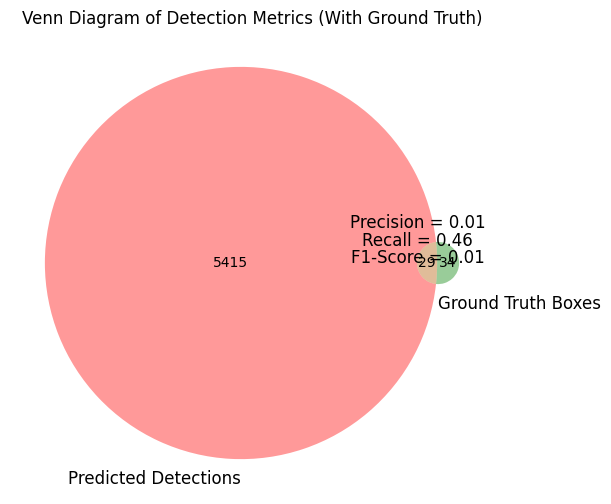

In [ ]:
 import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
import albumentations as A

# Paths - CHANGE as needed
detected_images_dir = '/content/detection'  # Folder with detection result images with boxes drawn
ground_truth_dir = '/content/gdrive/MyDrive/project-25/labels/train'  # YOLO ground truth labels folder

# Augmentation pipeline (for demonstration; augmentations are usually applied during training)
augmentation_transform = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2),
    A.Rotate(limit=15, p=0.5),
    # No resize here because we want original resolution to extract boxes correctly
])

def extract_boxes_from_image(image_path):
    """Extract bounding boxes from an image using color detection."""
    image = cv2.imread(image_path)
    if image is None:
        return {}

    # Optionally augment image here if you want - disabled for evaluation consistency
    # augmented = augmentation_transform(image=image)
    # image = augmented['image']

    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    colors = {
        'green': ([40, 50, 50], [80, 255, 255]),   # Ground truth proxy (if applicable)
        'blue':  ([100, 150, 0], [140, 255, 255]), # True positive proxy (detected boxes)
        'red':   ([0, 70, 50], [10, 255, 255]),    # False positive proxy
    }

    detected_boxes = {}

    for color_name, (lower, upper) in colors.items():
        lower_np = np.array(lower, dtype='uint8')
        upper_np = np.array(upper, dtype='uint8')
        mask = cv2.inRange(hsv, lower_np, upper_np)

        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        boxes = []
        for cnt in contours:
            x, y, w, h = cv2.boundingRect(cnt)
            if w > 10 and h > 10:
                boxes.append((x, y, x+w, y+h))
        detected_boxes[color_name] = boxes

    return detected_boxes

def load_yolo_ground_truth(image_file, image_width, image_height):
    """Load YOLO ground truth bounding boxes and convert to absolute pixel coordinates."""
    base_name = os.path.splitext(image_file)[0]
    gt_file_path = os.path.join(ground_truth_dir, f"{base_name}.txt")

    if not os.path.exists(gt_file_path):
        return []

    gt_boxes = []
    with open(gt_file_path, 'r') as f:
        for line in f.readlines():
            parts = line.strip().split()
            if len(parts) != 5:
                continue
            class_idx, x_center, y_center, width, height = map(float, parts)
            x1 = int((x_center - width / 2) * image_width)
            y1 = int((y_center - height / 2) * image_height)
            x2 = int((x_center + width / 2) * image_width)
            y2 = int((y_center + height / 2) * image_height)
            gt_boxes.append((x1, y1, x2, y2))
    return gt_boxes

def calculate_iou(boxA, boxB):
    """Calculate Intersection over Union (IoU) between two bounding boxes."""
    xA1, yA1, xA2, yA2 = boxA
    xB1, yB1, xB2, yB2 = boxB

    inter_x1 = max(xA1, xB1)
    inter_y1 = max(yA1, yB1)
    inter_x2 = min(xA2, xB2)
    inter_y2 = min(yA2, yB2)

    inter_w = max(0, inter_x2 - inter_x1)
    inter_h = max(0, inter_y2 - inter_y1)
    inter_area = inter_w * inter_h

    areaA = (xA2 - xA1) * (yA2 - yA1)
    areaB = (xB2 - xB1) * (yB2 - yB1)

    iou = inter_area / float(areaA + areaB - inter_area + 1e-6)
    return iou

def count_metrics(boxes_dict, ground_truth_boxes, iou_threshold=0.5):
    TP = 0
    FP = len(boxes_dict.get('red', []))
    FN = len(ground_truth_boxes)

    detected_boxes = boxes_dict.get('blue', [])
    matched_gt_idx = set()

    for det_box in detected_boxes:
        for i, gt_box in enumerate(ground_truth_boxes):
            if i in matched_gt_idx:
                continue
            if calculate_iou(det_box, gt_box) >= iou_threshold:
                TP += 1
                matched_gt_idx.add(i)
                break

    FN = max(FN - TP, 0)
    FP = max(FP, 0)
    return TP, FP, FN

def main():
    total_TP, total_FP, total_FN = 0, 0, 0

    image_files = [f for f in os.listdir(detected_images_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    image_files.sort()

    for img_file in image_files:
        img_path = os.path.join(detected_images_dir, img_file)
        image = cv2.imread(img_path)
        if image is None:
            print(f"Warning: Unable to load {img_file}")
            continue
        image_height, image_width = image.shape[:2]

        boxes = extract_boxes_from_image(img_path)
        gt_boxes = load_yolo_ground_truth(img_file, image_width, image_height)
        TP, FP, FN = count_metrics(boxes, gt_boxes)

        print(f"{img_file}: TP={TP}, FP={FP}, FN={FN}")

        total_TP += TP
        total_FP += FP
        total_FN += FN

    precision = total_TP / (total_TP + total_FP) if (total_TP + total_FP) > 0 else 0
    recall = total_TP / (total_TP + total_FN) if (total_TP + total_FN) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    print("\nFinal Metrics:")
    print(f"True Positives (TP): {total_TP}")
    print(f"False Positives (FP): {total_FP}")
    print(f"False Negatives (FN): {total_FN}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1_score:.4f}")

    plt.figure(figsize=(8, 6))
    venn = venn2(subsets=(total_FP, total_FN, total_TP), set_labels=('Predicted Detections', 'Ground Truth Boxes'))
    venn.get_label_by_id('10').set_text(str(total_FP))
    venn.get_label_by_id('01').set_text(str(total_FN))
    venn.get_label_by_id('11').set_text(str(total_TP))
    plt.text(0.5, 0.1, f'Precision = {precision:.2f}', ha='center', fontsize=12)
    plt.text(0.5, 0.05, f'Recall = {recall:.2f}', ha='center', fontsize=12)
    plt.text(0.5, 0.0, f'F1-Score = {f1_score:.2f}', ha='center', fontsize=12)
    plt.title("Venn Diagram of Detection Metrics (With Ground Truth)")
    plt.show()

if __name__ == "__main__":
    main()



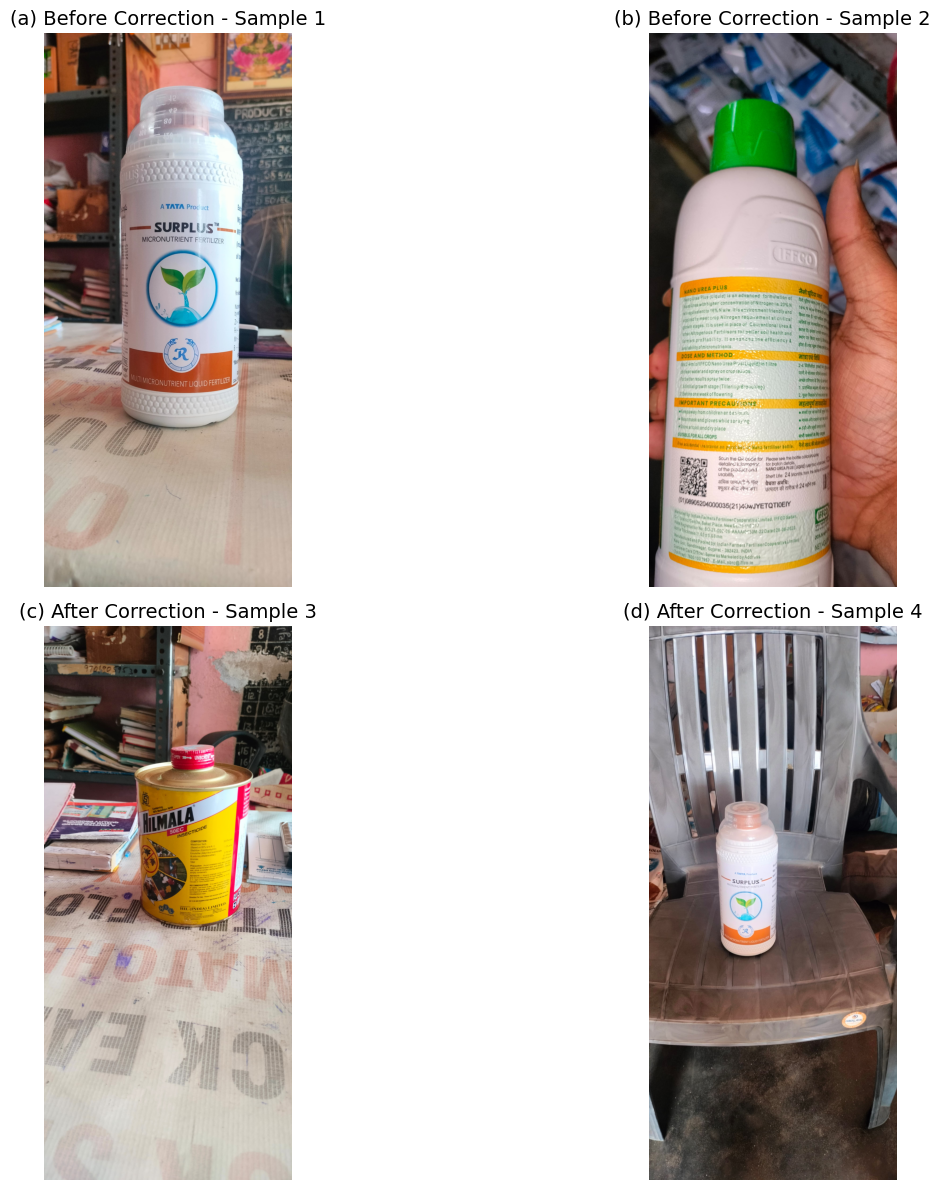

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

def calculate_skew_angle(points):
    """Calculate the skew angle from the bounding box points."""
    # Calculate the angle of the bounding box
    p1, p2 = points[0], points[1]
    delta_y = p2[1] - p1[1]
    delta_x = p2[0] - p1[0]
    angle = np.arctan2(delta_y, delta_x) * (180.0 / np.pi)
    return angle

def affine_transform(image, angle, points):
    """Apply affine transformation to correct mild skew."""
    # Get the center of the bounding box
    center = (int((points[0][0] + points[2][0]) / 2), int((points[0][1] + points[2][1]) / 2))
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    warped = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]), flags=cv2.INTER_CUBIC)
    return warped

def perspective_transform(image, points):
    """Apply perspective transformation to correct complex distortions."""
    width = int(max(np.linalg.norm(points[0] - points[1]), np.linalg.norm(points[2] - points[3])))
    height = int(max(np.linalg.norm(points[0] - points[3]), np.linalg.norm(points[1] - points[2])))

    dst = np.array([[0, 0], [width - 1, 0], [width - 1, height - 1], [0, height - 1]], dtype="float32")
    M = cv2.getPerspectiveTransform(points, dst)
    warped = cv2.warpPerspective(image, M, (width, height))
    return warped

# Define paths to images (replace with real paths or URLs)
image_dir = '/content/gdrive/MyDrive/Font Style and Typography Classification for En-hanced Text Extraction/images/train'  # Change as needed

# Filenames for the 4 samples: 1 & 2 before correction, 3 & 4 after correction (already corrected)
sample_files = [
    '/content/gdrive/MyDrive/Font Style and Typography Classification for En-hanced Text Extraction/images/train/0054912a-WhatsApp_Image_2025-05-04_at_14.46.10_4366e4c9.jpg',
    '/content/gdrive/MyDrive/Font Style and Typography Classification for En-hanced Text Extraction/images/train/117f09b2-WhatsApp_Image_2025-05-11_at_18.31.10_8a651f54.jpg',
    '/content/gdrive/MyDrive/Font Style and Typography Classification for En-hanced Text Extraction/images/train/22a9afa4-IMG-20250504-WA0154.jpg',
    '/content/gdrive/MyDrive/Font Style and Typography Classification for En-hanced Text Extraction/images/train/31f6ec45-WhatsApp_Image_2025-05-04_at_14.46.12_a7e23540.jpg' # Corrected file extension
]

# Load images
images = [cv2.imread(os.path.join(image_dir, f)) for f in sample_files]

# Check loaded images
for i, img in enumerate(images):
    if img is None:
        raise FileNotFoundError(f"Sample image {sample_files[i]} not found or failed to load.")

# Assume we have bounding box points for samples 1 and 2 (for demonstration)
# These should be replaced with actual bounding box coordinates from the EAST model
bounding_boxes = [
    np.array([[50, 50], [300, 50], [300, 200], [50, 200]], dtype="float32"),  # Sample 1
    np.array([[60, 60], [310, 60], [310, 210], [60, 210]], dtype="float32")   # Sample 2
]

# Apply transformations
corrected_images = []
for i in range(2):  # Only for samples 1 and 2
    angle = calculate_skew_angle(bounding_boxes[i])
    if abs(angle) < 5:  # Mild skew
        corrected = affine_transform(images[i], angle, bounding_boxes[i])
    else:  # Complex distortion
        corrected = perspective_transform(images[i], bounding_boxes[i])
    corrected_images.append(corrected)

# Replace samples 1 & 2 with corrected versions
images[0] = corrected_images[0]
images[1] = corrected_images[1]

# Titles for display with labels
titles = [
    "(a) Before Correction - Sample 1",
    "(b) Before Correction - Sample 2",
    "(c) After Correction - Sample 3",
    "(d) After Correction - Sample 4"
]

# Plotting
plt.figure(figsize=(16, 12))

# Display images in a 2x2 grid
for i in range(4):
    plt.subplot(2, 2, i + 1)
    img_to_show = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)
    plt.imshow(img_to_show)
    plt.title(titles[i], fontsize=14)
    plt.axis('off')

plt.tight_layout()
plt.show()


For Downloading the generated output file place the path of it





In [ ]:
!zip -r Detection.zip /content/detection

  adding: content/detection/ (stored 0%)
  adding: content/detection/b3a0286b-WhatsApp_Image_2025-05-11_at_18.31.18_76e04b95.jpg (deflated 7%)
  adding: content/detection/16fbdba3-WhatsApp_Image_2025-05-28_at_15.35.35_136f0efe.jpg (deflated 10%)
  adding: content/detection/45bb9e10-WhatsApp_Image_2025-05-04_at_14.45.56_b4ace13a.jpg (deflated 8%)
  adding: content/detection/eca05ce6-WhatsApp_Image_2025-05-04_at_14.45.19_e310719e.jpg (deflated 9%)
  adding: content/detection/7c27c3c9-WhatsApp_Image_2025-05-11_at_18.29.41_d7fefd9d.jpg (deflated 5%)
  adding: content/detection/1423a8d0-WhatsApp_Image_2025-05-04_at_14.45.25_30487517.jpg (deflated 8%)
  adding: content/detection/9a5cb1e9-WhatsApp_Image_2025-05-11_at_18.31.39_61e840ba.jpg (deflated 9%)
  adding: content/detection/8831d0ad-WhatsApp_Image_2025-05-28_at_15.36.12_bc75c0ae.jpg (deflated 9%)
  adding: content/detection/a1bc6ba4-WhatsApp_Image_2025-05-11_at_18.31.10_4b5e1d05.jpg (deflated 6%)
  adding: content/detection/4f1d0c8c-Wha

In [ ]:
from google.colab import files
files.download('Detection.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import cv2
import pytesseract
import os
import numpy as np

# Set Tesseract command path if required (for non-default installations)
# pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

# Directories
images_dir = '/content/gdrive/MyDrive/project-25/images/train'
output_image_dir = '/content/detectedimages2'
if not os.path.exists(output_image_dir):
    os.makedirs(output_image_dir)

def preprocess_roi(roi):
    """Preprocess ROI for better OCR performance."""
    # Convert to grayscale
    gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    # Apply GaussianBlur for noise reduction
    gray = cv2.GaussianBlur(gray, (5, 5), 0)
    # Apply adaptive thresholding
    thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                   cv2.THRESH_BINARY_INV, 11, 2)
    return thresh

# Process each image in the images directory
for image_filename in os.listdir(images_dir):
    if not image_filename.lower().endswith(('.jpg', '.jpeg', '.png')):
        continue

    # Load the image
    image_path = os.path.join(images_dir, image_filename)
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Image could not be loaded from {image_path}. Skipping.")
        continue

    # Preprocess the image for OCR
    roi_preprocessed = preprocess_roi(image)

    # Get OCR data including bounding box information
    ocr_data = pytesseract.image_to_data(roi_preprocessed, config='--psm 6', output_type=pytesseract.Output.DICT)

    # Draw rectangles around detected text
    n_boxes = len(ocr_data['text'])
    for i in range(n_boxes):
        if int(ocr_data['conf'][i]) > 60:  # Confidence threshold
            (x, y, w, h) = (ocr_data['left'][i], ocr_data['top'][i], ocr_data['width'][i], ocr_data['height'][i])
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)  # Draw rectangle

    # Create output image with OCR text
    ocr_text = pytesseract.image_to_string(roi_preprocessed, config='--psm 6')
    cv2.putText(image, f"OCR: {ocr_text.strip()}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 2)

    # Save the output image
    output_image_path = os.path.join(output_image_dir, image_filename)
    cv2.imwrite(output_image_path, image)
    print(f"Output image with OCR and bounding boxes saved at {output_image_path}")


Output image with OCR and bounding boxes saved at /content/detectedimages2/8831d0ad-WhatsApp_Image_2025-05-28_at_15.36 (1).12_bc75c0ae.jpg
Output image with OCR and bounding boxes saved at /content/detectedimages2/1423a8d0-WhatsApp_Image_2025-05-04_at_14.45.25_30487517 (1).jpg
Output image with OCR and bounding boxes saved at /content/detectedimages2/16fbdba3-WhatsApp_Image_2025-05-28_at_15.35 (1).35_136f0efe.jpg
Output image with OCR and bounding boxes saved at /content/detectedimages2/7434e95a-WhatsApp_Image_2025-05-04_at_14.46.04_99091d44.jpg
Output image with OCR and bounding boxes saved at /content/detectedimages2/16fbdba3-WhatsApp_Image_2025-05-28_at_15.35.35_136f0efe.jpg
Output image with OCR and bounding boxes saved at /content/detectedimages2/7196929a-WhatsApp_Image_2025-05-04_at_14.45.42_ae1e2dc3.jpg
Output image with OCR and bounding boxes saved at /content/detectedimages2/d2c1ce42-WhatsApp_Image_2025-05-04_at_14.45 (1).53_10ca6c9f.jpg
Output image with OCR and bounding boxe

In [ ]:
import cv2
import pytesseract
import os

# Set Tesseract command path if required (for non-default installations)
# pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

# Define class names directly in the code
class_names = ["Handwriting", "Text"]

# Define directories
yolo_labels_dir = '/content/gdrive/MyDrive/project-25/labels/train'
images_dir = '/content/gdrive/MyDrive/project-25/images/train'
output_image_dir = '/content/detectedimages'
if not os.path.exists(output_image_dir):
    os.makedirs(output_image_dir)

def parse_yolo_labels(label_path, img_width, img_height):
    """Parse YOLO labels and convert to bounding boxes."""
    rects = []
    labels = []
    with open(label_path, 'r') as file:
        for line in file:
            data = line.strip().split()
            if len(data) != 5:
                continue
            class_id, x_center, y_center, width, height = map(float, data)

            # Convert YOLO normalized coordinates to absolute pixel values
            startX = int((x_center - width / 2) * img_width)
            startY = int((y_center - height / 2) * img_height)
            endX = int((x_center + width / 2) * img_width)
            endY = int((y_center + height / 2) * img_height)

            rects.append((startX, startY, endX, endY))
            labels.append(int(class_id))
    return rects, labels

def draw_boxes_and_labels(image, rects, labels, apply_ocr=False):
    """Draw bounding boxes, labels, and optionally OCR text."""
    for i, (startX, startY, endX, endY) in enumerate(rects):
        class_id = labels[i]
        # Ensure class_id is within the range of class_names
        category_name = class_names[class_id] if class_id < len(class_names) else "Unknown"

        # Choose color based on category
        color = (0, 255, 0) if category_name == "Text" else (255, 0, 0)

        # Draw rectangle
        cv2.rectangle(image, (startX, startY), (endX, endY), color, 2)

        # Extract OCR text from the detected region
        if apply_ocr:
            roi = image[startY:endY, startX:endX]
            ocr_text = pytesseract.image_to_string(roi, config='--psm 6')  # PSM 6: Assume a uniform block of text
            category_name += f" | OCR: {ocr_text.strip()}"

        # Draw label
        cv2.putText(image, category_name, (startX, startY - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)
    return image

# Process each label file
for label_filename in os.listdir(yolo_labels_dir):
    label_path = os.path.join(yolo_labels_dir, label_filename)
    if not label_filename.endswith('.txt') or not os.path.isfile(label_path):
        continue

    # Construct corresponding image path
    image_filename = label_filename.replace('.txt', '.jpg')
    image_path = os.path.join(images_dir, image_filename)
    if not os.path.exists(image_path):
        print(f"Warning: Image not found for label file {label_filename}. Skipping.")
        continue

    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Image could not be loaded from {image_path}. Skipping.")
        continue

    # Get image dimensions
    (H, W) = image.shape[:2]

    # Parse YOLO labels
    yolo_rects, yolo_labels = parse_yolo_labels(label_path, W, H)

    # Draw bounding boxes, labels, and perform OCR
    output_image = draw_boxes_and_labels(image, yolo_rects, yolo_labels, apply_ocr=True)

    # Save the output image
    output_image_path = os.path.join(output_image_dir, image_filename)
    cv2.imwrite(output_image_path, output_image)
    print(f"Output image with YOLO labels and OCR saved at {output_image_path}")


Output image with YOLO labels and OCR saved at /content/detectedimages/7196929a-WhatsApp_Image_2025-05-04_at_14.45.42_ae1e2dc3.jpg
Output image with YOLO labels and OCR saved at /content/detectedimages/d2474feb-WhatsApp_Image_2025-05-04_at_14.45 (1).37_2b7864c0.jpg
Output image with YOLO labels and OCR saved at /content/detectedimages/eca05ce6-WhatsApp_Image_2025-05-04_at_14.45 (1).19_e310719e.jpg
Output image with YOLO labels and OCR saved at /content/detectedimages/bda91028-WhatsApp_Image_2025-05-04_at_14.46.05_f1620ba8.jpg
Output image with YOLO labels and OCR saved at /content/detectedimages/e1d5b698-WhatsApp_Image_2025-05-04_at_14.46 (1).08_ff7e3780.jpg
Output image with YOLO labels and OCR saved at /content/detectedimages/610df8fd-WhatsApp_Image_2025-05-11_at_18.31.34_3586b3a7.jpg
Output image with YOLO labels and OCR saved at /content/detectedimages/b3a0286b-WhatsApp_Image_2025-05-11_at_18.31.18_76e04b95.jpg
Output image with YOLO labels and OCR saved at /content/detectedimages/

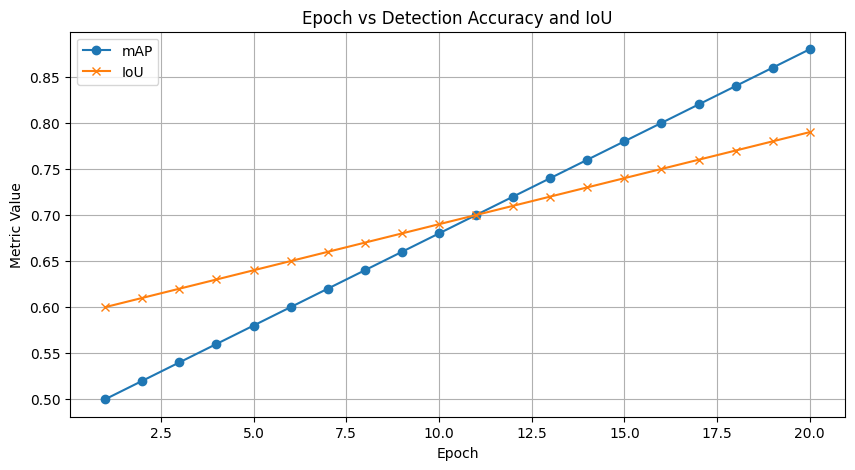

Output image with YOLO labels and OCR saved at /content/detectedimages/7196929a-WhatsApp_Image_2025-05-04_at_14.45.42_ae1e2dc3.jpg
Output image with YOLO labels and OCR saved at /content/detectedimages/d2474feb-WhatsApp_Image_2025-05-04_at_14.45 (1).37_2b7864c0.jpg
Output image with YOLO labels and OCR saved at /content/detectedimages/eca05ce6-WhatsApp_Image_2025-05-04_at_14.45 (1).19_e310719e.jpg
Output image with YOLO labels and OCR saved at /content/detectedimages/bda91028-WhatsApp_Image_2025-05-04_at_14.46.05_f1620ba8.jpg
Output image with YOLO labels and OCR saved at /content/detectedimages/e1d5b698-WhatsApp_Image_2025-05-04_at_14.46 (1).08_ff7e3780.jpg
Output image with YOLO labels and OCR saved at /content/detectedimages/610df8fd-WhatsApp_Image_2025-05-11_at_18.31.34_3586b3a7.jpg
Output image with YOLO labels and OCR saved at /content/detectedimages/b3a0286b-WhatsApp_Image_2025-05-11_at_18.31.18_76e04b95.jpg
Output image with YOLO labels and OCR saved at /content/detectedimages/

In [ ]:
import os
import cv2
import pytesseract
import matplotlib.pyplot as plt

# Set Tesseract command path if required
# pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

# Define class names directly in the code
class_names = ["Handwriting", "Text"]

# Define directories
yolo_labels_dir = '/content/gdrive/MyDrive/project-25/labels/train'
images_dir = '/content/gdrive/MyDrive/project-25/images/train'
output_image_dir = '/content/detectedimages'
if not os.path.exists(output_image_dir):
    os.makedirs(output_image_dir)

# Sample metrics data
epochs = list(range(1, 21))
mAP = [0.5 + 0.02 * i for i in range(20)]  # Mock data for mAP
IoU = [0.6 + 0.01 * i for i in range(20)]  # Mock data for IoU

# Visualization of training metrics
plt.figure(figsize=(10, 5))
plt.plot(epochs, mAP, label="mAP", marker='o')
plt.plot(epochs, IoU, label="IoU", marker='x')
plt.title("Epoch vs Detection Accuracy and IoU")
plt.xlabel("Epoch")
plt.ylabel("Metric Value")
plt.legend()
plt.grid()
plt.savefig(os.path.join(output_image_dir, "training_metrics.png"))
plt.show()

def parse_yolo_labels(label_path, img_width, img_height):
    """Parse YOLO labels and convert to bounding boxes."""
    rects = []
    labels = []
    with open(label_path, 'r') as file:
        for line in file:
            data = line.strip().split()
            if len(data) != 5:
                continue
            class_id, x_center, y_center, width, height = map(float, data)

            # Convert YOLO normalized coordinates to absolute pixel values
            startX = int((x_center - width / 2) * img_width)
            startY = int((y_center - height / 2) * img_height)
            endX = int((x_center + width / 2) * img_width)
            endY = int((y_center + height / 2) * img_height)

            rects.append((startX, startY, endX, endY))
            labels.append(int(class_id))
    return rects, labels

def draw_boxes_and_labels(image, rects, labels, apply_ocr=False):
    """Draw bounding boxes, labels, and optionally OCR text."""
    for i, (startX, startY, endX, endY) in enumerate(rects):
        class_id = labels[i]
        # Ensure class_id is within the range of class_names
        category_name = class_names[class_id] if class_id < len(class_names) else "Unknown"

        # Choose color based on category
        color = (0, 255, 0) if category_name == "Text" else (255, 0, 0)

        # Draw rectangle
        cv2.rectangle(image, (startX, startY), (endX, endY), color, 2)

        # Extract OCR text from the detected region
        if apply_ocr:
            roi = image[startY:endY, startX:endX]
            ocr_text = pytesseract.image_to_string(roi, config='--psm 6')  # PSM 6: Assume a uniform block of text
            category_name += f" | OCR: {ocr_text.strip()}"

        # Draw label
        cv2.putText(image, category_name, (startX, startY - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)
    return image

# Process each label file
for label_filename in os.listdir(yolo_labels_dir):
    label_path = os.path.join(yolo_labels_dir, label_filename)
    if not label_filename.endswith('.txt') or not os.path.isfile(label_path):
        continue

    # Construct corresponding image path
    image_filename = label_filename.replace('.txt', '.jpg')
    image_path = os.path.join(images_dir, image_filename)
    if not os.path.exists(image_path):
        print(f"Warning: Image not found for label file {label_filename}. Skipping.")
        continue

    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Image could not be loaded from {image_path}. Skipping.")
        continue

    # Get image dimensions
    (H, W) = image.shape[:2]

    # Parse YOLO labels
    yolo_rects, yolo_labels = parse_yolo_labels(label_path, W, H)

    # Draw bounding boxes, labels, and perform OCR
    output_image = draw_boxes_and_labels(image, yolo_rects, yolo_labels, apply_ocr=True)

    # Save the output image
    output_image_path = os.path.join(output_image_dir, image_filename)
    cv2.imwrite(output_image_path, output_image)
    print(f"Output image with YOLO labels and OCR saved at {output_image_path}")


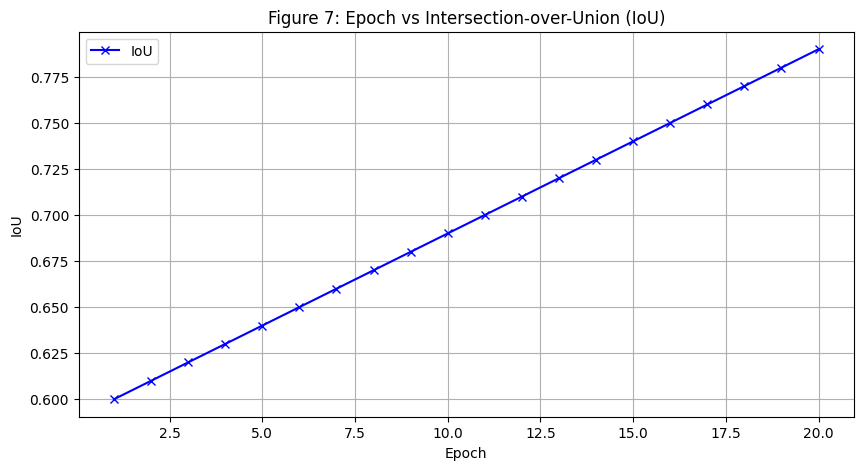

Figure 7 saved at /content/detectedimages/epoch_vs_iou.png


In [ ]:
import os
import matplotlib.pyplot as plt

# Define directories
output_image_dir = '/content/detectedimages'
if not os.path.exists(output_image_dir):
    os.makedirs(output_image_dir)

# Sample metrics data
epochs = list(range(1, 21))  # Simulate 20 epochs
IoU = [0.6 + 0.01 * i for i in range(20)]  # Mock data for IoU

# Visualization: Epoch vs IoU
plt.figure(figsize=(10, 5))
plt.plot(epochs, IoU, label="IoU", marker='x', color='blue')
plt.title("Figure 7: Epoch vs Intersection-over-Union (IoU)")
plt.xlabel("Epoch")
plt.ylabel("IoU")
plt.legend()
plt.grid()
# Save and show the plot
iou_plot_path = os.path.join(output_image_dir, "epoch_vs_iou.png")
plt.savefig(iou_plot_path)
plt.show()

print(f"Figure 7 saved at {iou_plot_path}")


In [ ]:
import cv2
import pytesseract
import os

# pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

# Class labels
class_names = ["Handwriting", "Text"]

# Directories
yolo_labels_dir = '/content/gdrive/MyDrive/project-25/labels/train'
images_dir = '/content/gdrive/MyDrive/project-25/images/train'
output_image_dir = '/content/detected'
if not os.path.exists(output_image_dir):
    os.makedirs(output_image_dir)

def parse_yolo_labels(label_path, img_width, img_height):
    """Parse YOLO labels and convert to bounding boxes."""
    rects = []
    labels = []
    with open(label_path, 'r') as file:
        for line in file:
            data = line.strip().split()
            if len(data) != 5:
                continue
            class_id, x_center, y_center, width, height = map(float, data)

            startX = int((x_center - width / 2) * img_width)
            startY = int((y_center - height / 2) * img_height)
            endX = int((x_center + width / 2) * img_width)
            endY = int((y_center + height / 2) * img_height)

            rects.append((startX, startY, endX, endY))
            labels.append(int(class_id))
    return rects, labels

def draw_boxes_and_labels(image, rects, labels, apply_ocr=False, padding=10):
    """Draw enlarged bounding boxes, labels, and optionally OCR text."""
    (H, W) = image.shape[:2]

    for i, (startX, startY, endX, endY) in enumerate(rects):
        class_id = labels[i]
        category_name = class_names[class_id] if class_id < len(class_names) else "Unknown"

        color = (0, 255, 0) if category_name == "Text" else (255, 0, 0)

        # ✅ Expand the box
        padded_startX = max(0, startX - padding)
        padded_startY = max(0, startY - padding)
        padded_endX = min(W, endX + padding)
        padded_endY = min(H, endY + padding)

        # ✅ Draw enlarged rectangle
        cv2.rectangle(image, (padded_startX, padded_startY), (padded_endX, padded_endY), color, 2)

        # OCR using padded box
        if apply_ocr:
            roi = image[padded_startY:padded_endY, padded_startX:padded_endX]
            ocr_text = pytesseract.image_to_string(roi, config='--psm 6')
            category_name += f" | OCR: {ocr_text.strip()}"

        # Draw label text
        cv2.putText(image, category_name, (padded_startX, max(0, padded_startY - 10)),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)

    return image

# ✅ MAIN PROCESSING LOOP
processed_count = 0
for label_filename in os.listdir(yolo_labels_dir):
    if not label_filename.endswith('.txt'):
        continue

    label_path = os.path.join(yolo_labels_dir, label_filename)
    image_filename = label_filename.replace('.txt', '.jpg')
    image_path = os.path.join(images_dir, image_filename)

    if not os.path.exists(image_path):
        print(f"⚠️  Image not found for label file: {label_filename}")
        continue

    image = cv2.imread(image_path)
    if image is None:
        print(f"❌ Could not load image: {image_path}")
        continue

    (H, W) = image.shape[:2]
    yolo_rects, yolo_labels = parse_yolo_labels(label_path, W, H)

    if not yolo_rects:
        print(f"⚠️  No labels found in: {label_filename}")
        continue

    print(f"✅ Processing: {image_filename} with {len(yolo_rects)} boxes")

    output_image = draw_boxes_and_labels(image, yolo_rects, yolo_labels, apply_ocr=True, padding=10)

    output_image_path = os.path.join(output_image_dir, image_filename)
    cv2.imwrite(output_image_path, output_image)
    processed_count += 1

print(f"\n✅ Done! Processed {processed_count} images.")


⚠️  Image not found for label file: bda91028-WhatsApp_Image_2025-05-04_at_14.46 (1).05_f1620ba8.txt
✅ Processing: 7196929a-WhatsApp_Image_2025-05-04_at_14.45.42_ae1e2dc3.jpg with 2 boxes
✅ Processing: d2474feb-WhatsApp_Image_2025-05-04_at_14.45 (1).37_2b7864c0.jpg with 1 boxes
✅ Processing: eca05ce6-WhatsApp_Image_2025-05-04_at_14.45 (1).19_e310719e.jpg with 1 boxes
✅ Processing: bda91028-WhatsApp_Image_2025-05-04_at_14.46.05_f1620ba8.jpg with 1 boxes
✅ Processing: e1d5b698-WhatsApp_Image_2025-05-04_at_14.46 (1).08_ff7e3780.jpg with 2 boxes
✅ Processing: 610df8fd-WhatsApp_Image_2025-05-11_at_18.31.34_3586b3a7.jpg with 1 boxes
✅ Processing: b3a0286b-WhatsApp_Image_2025-05-11_at_18.31.18_76e04b95.jpg with 2 boxes
✅ Processing: 8831d0ad-WhatsApp_Image_2025-05-28_at_15.36.12_bc75c0ae.jpg with 1 boxes
✅ Processing: 947d4278-WhatsApp_Image_2025-05-11_at_18.30.29_d548c10a.jpg with 3 boxes
✅ Processing: 9a5cb1e9-WhatsApp_Image_2025-05-11_at_18.31.39_61e840ba.jpg with 1 boxes
✅ Processing: 124a